In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

**Import data from tensorflow dataset `mnist_fasion`**

In [2]:
dataset = tf.keras.datasets.fashion_mnist

In [3]:
dataset

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\vicky\\AppData\\Roaming\\Python\\Python311\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [4]:
(x_train, y_train), (x_test, y_test) = dataset.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

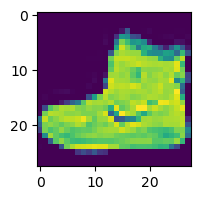

In [8]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[0])

In [9]:
y_train[0]

9

## Label Description

In [10]:
import pandas as pd

label_description = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

label_df = pd.DataFrame(list(label_description.items()), columns=['Label', 'Description'])
label_df

,Label,Description
0,0,T-shirt/top
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


## Normilization or Feature Scalling

In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Model Building

In [13]:
x_train.shape


(60000, 28, 28)

In [14]:
model = tf.keras.Sequential([
    #CNN 
    keras.layers.Conv2D(filters=20, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=30, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
                        
    #DENSE
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 30)        5430      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 30)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 750)               0         
                                                                 
 dense (Dense)               (None, 128)               9

In [16]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

In [17]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 32s 16ms/step - loss: 0.4812 - acc: 0.8202 - val_loss: 0.3703 - val_acc: 0.8677
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3196 - acc: 0.8805 - val_loss: 0.3110 - val_acc: 0.8888
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2754 - acc: 0.8967 - val_loss: 0.2962 - val_acc: 0.8921
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2475 - acc: 0.9077 - val_loss: 0.2811 - val_acc: 0.8969
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2224 - acc: 0.9156 - val_loss: 0.2860 - val_acc: 0.8985
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2043 - acc: 0.9228 - val_loss: 0.2675 - val_acc: 0.9035
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1864 - acc: 0.9289 - val_loss: 0.2768 - val_acc: 0.9024
Epoch 8/10
1875/1875 [==========================

## testing with test_dataset image

In [18]:
predicted_val = model.predict(x_test)

313/313 [==============================] - 3s 9ms/step


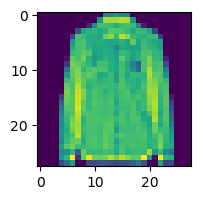

In [19]:
import random
n = random.randint(0,9999)
plt.figure(figsize=(2,2))
plt.imshow(x_test[n])

In [20]:
pred_val = np.argmax(predicted_val[n])
print("Predicted Label:", label_description[pred_val])

Predicted Label: Shirt


## testing with external image

In [21]:
from tensorflow.keras.preprocessing import image
test = r"D:\image for testing\t-shirt.jpeg"

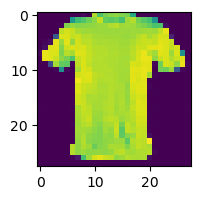

In [22]:
img = image.load_img(test, target_size=(28, 28), color_mode="grayscale")
plt.figure(figsize=(2,2))
plt.imshow(img, interpolation="nearest")
plt.show()

In [23]:
test_image = image.img_to_array(img)
test_image = np.expand_dims(test_image, axis= 0)
result = model.predict(test_image)
result

1/1 [==============================] - 0s 238ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
pred_val = np.argmax(result)
print("Predicted Label:", label_description[pred_val])

Predicted Label: T-shirt/top
